<div style="background-color: orange">
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#store'>Store Set</a></li>
<li><a href='#germany'>Germany Set</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets
import vega_datasets as data

# .py file
import acquire as a
import prepare as p

<div style='background-color: orange'>
<a id='store'></a>
    <b><u><i><h1 style='text-align: center'>
        Store Set
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#storeq1'>Question 1</a></li>
<li><a href='#storeq2'>Question 2</a></li>
<li><a href='#storeq3'>Question 3</a></li>
<li><a href='#storeq4'>Question 4</a></li>
<li><a href='#storeq5'>Question 5</a></li>
<li><a href='#storeq6'>Question 6</a></li>

Using your store items data:

In [2]:
store = a.acquire_store()
store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_id,store_address,store_zipcode,store_city,store_state
582399,32,Barefoot,Barefoot Pinot Grigio 187,0.68,582400,2017-09-28,52,9,735 SW Military Dr,78221,San Antonio,TX


In [3]:
store.shape

(913000, 12)

---

<a id='storeq1'></a>
### 1. Convert date column to datetime format.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [4]:
# Convert 'sale_date' column from object to datetime
store.sale_date = pd.to_datetime(store.sale_date)
store.dtypes

item_id                   int64
item_brand               object
item_name                object
item_price              float64
sale_id                   int64
sale_date        datetime64[ns]
sale_amount               int64
store_id                  int64
store_address            object
store_zipcode             int64
store_city               object
store_state              object
dtype: object

---

<a id='storeq2'></a>
### 2. Plot the distribution of sale_amount and item_price.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

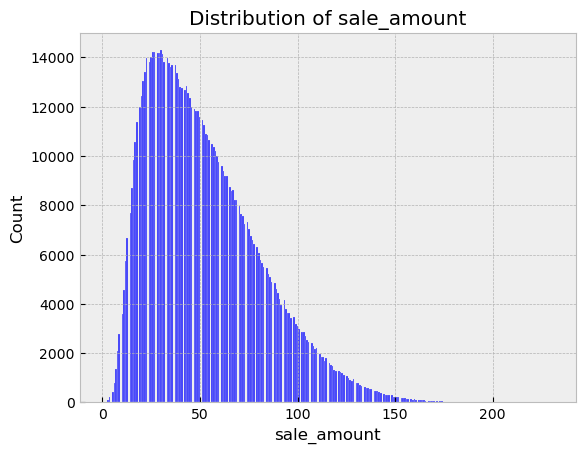

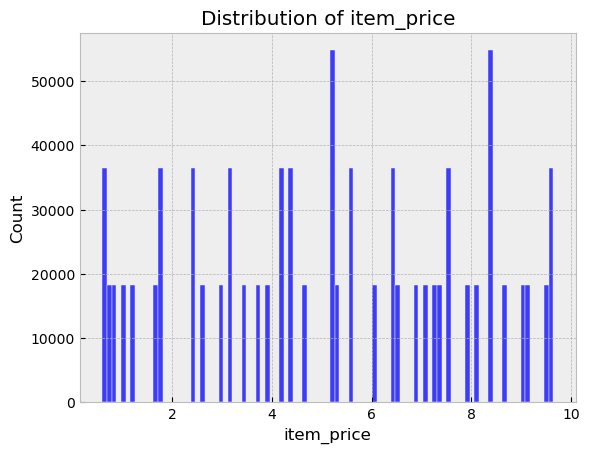

In [5]:
with plt.style.context('bmh'):
    sns.histplot(data=store, x='sale_amount')
    plt.title('Distribution of sale_amount')
    plt.show()
    sns.histplot(data=store, x='item_price')
    plt.title('Distribution of item_price')
    plt.show()

---

<a id='storeq3'></a>
### 3. Set the index to be the datetime variable.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [6]:
store = store.set_index(store.sale_date)
store = store.drop(columns='sale_date')
store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_amount,store_id,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,
2017-02-02,38,Sundown Naturals,Sundown Naturals Essential Electrolytes Tropic...,3.45,693548,106,10,8503 NW Military Hwy,78231,San Antonio,TX


---

<a id='storeq4'></a>
### 4. Add a 'month' and 'day of week' column to your dataframe.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [7]:
store['month'] = store.index.month
store['dayofweek'] = store.index.dayofweek
store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_amount,store_id,store_address,store_zipcode,store_city,store_state,month,dayofweek
sale_date,,,,,,,,,,,,,
2013-03-03,43,Ferrara,Ferrara Vanilla Syrup,8.4,766982,41,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,3,6


---

<a id='storeq5'></a>
### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [8]:
store['sales_total'] = store.sale_amount * store.item_price
store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_amount,store_id,store_address,store_zipcode,store_city,store_state,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,
2014-04-13,30,Petmate,Petmate Booda Bones Steak Bacon & Chicken Flav...,8.39,539138,31,6,1015 S WW White Rd,78220,San Antonio,TX,4,6,260.09


---

<a id='storeq6'></a>
### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [9]:
pyfile_store = p.prepare_store()
pyfile_store.sample()

,item_id,item_brand,item_name,item_price,sale_id,sale_amount,store_id,store_address,store_zipcode,store_city,store_state,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,
2016-06-21,24,Smart Living,Smart Living Charcoal Lighter Fluid,5.34,423074,107,2,9255 FM 471 West,78251,San Antonio,TX,6,1,571.38


<div style='background-color: orange'>
<a id='germany'></a>
    <b><u><i><h1 style='text-align: center'>
        Germany Set
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germanyq1'>Question 1</a></li>
<li><a href='#germanyq2'>Question 2</a></li>
<li><a href='#germanyq3'>Question 3</a></li>
<li><a href='#germanyq4'>Question 4</a></li>
<li><a href='#germanyq5'>Question 5</a></li>
<li><a href='#germanyq6'>Question 6</a></li>

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [10]:
germany = pd.read_csv('germany.csv', index_col=0)
germany.sample()

,Date,Consumption,Wind,Solar,Wind+Solar
4108,2017-04-01,1186.056,82.512,144.801,227.313


In [11]:
germany.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

---

<a id='germanyq1'></a>
### 1. Convert date column to datetime format.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

In [12]:
germany.Date = pd.to_datetime(germany.Date)
germany.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

---

<a id='germanyq2'></a>
### 2. Plot the distribution of each of your variables.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

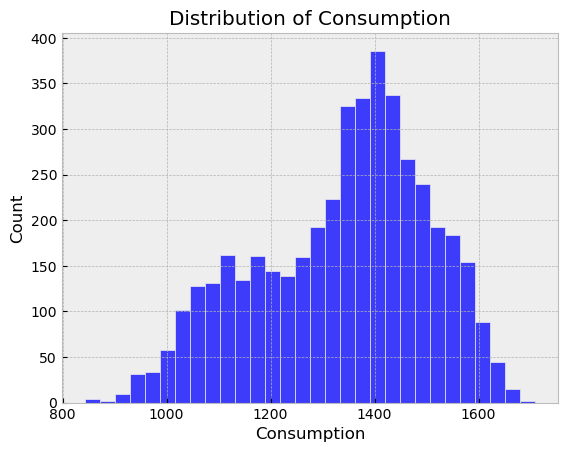

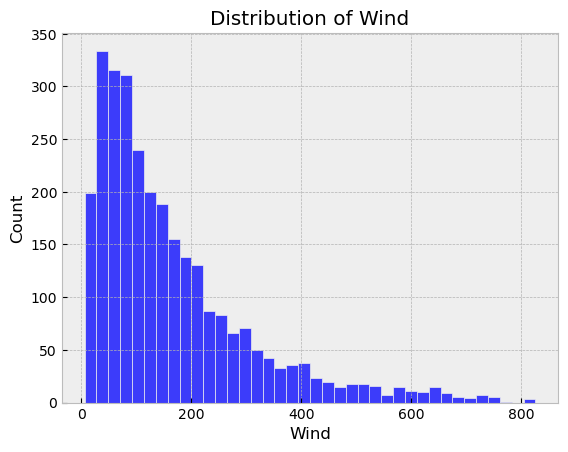

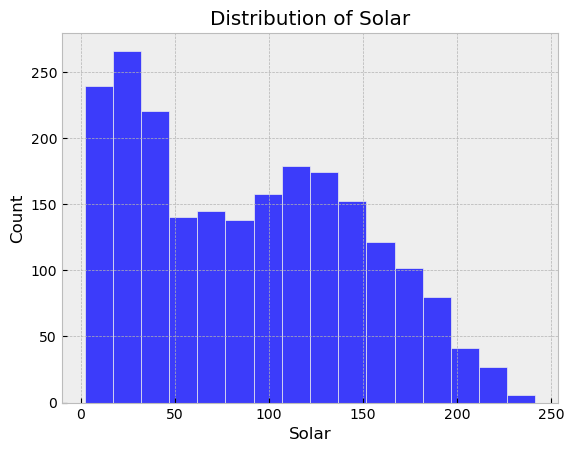

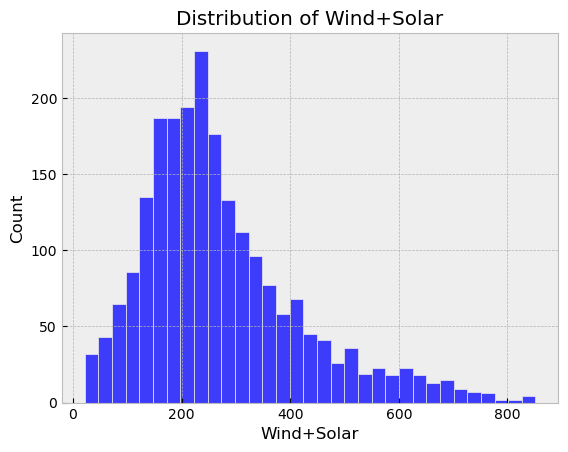

In [13]:
col_for_visuals = germany.drop(columns='Date').columns.to_list()
for col in col_for_visuals:
    with plt.style.context('bmh'):
        sns.histplot(data=germany, x=col)
        plt.title(f'Distribution of {col}')
        plt.show()

---

<a id='germanyq3'></a>
### 3. Set the index to be the datetime variable.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

In [14]:
germany = germany.set_index(germany.Date)
germany = germany.drop(columns='Date')
germany.sample()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2010-04-28,1326.288,28.209,NaN,NaN


---

<a id='germanyq4'></a>
### 4. Add a month and a year column to your dataframe.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

In [15]:
germany['year'] = germany.index.year
germany['month'] = germany.index.month
germany.sample()

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2014-03-07,1514.897,114.278,120.06,234.338,2014,3


---

<a id='germanyq5'></a>
### 5. Fill any missing values.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

In [16]:
# Prior to filling nulls
germany.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
year              0
month             0
dtype: int64

In [17]:
# Need to fill 'Wind', 'Solar', 'Wind+Solar'...
germany.Wind = germany.Wind.fillna(round(germany.Wind.mean(), 3))
germany.Solar = germany.Solar.fillna(round(germany.Solar.mean(), 3))
germany['Wind+Solar'] = germany['Wind+Solar'].fillna(round(germany['Wind+Solar'].mean(), 3))

In [18]:
# After filling nulls
germany.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
year           0
month          0
dtype: int64

---

<a id='germanyq6'></a>
### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

In [19]:
# Verify columns
pyfile_germany = p.prepare_germany()
pyfile_germany.sample()

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-12-12,1561.264,164.814,89.259,272.663,2006,12


In [20]:
# Verify no nulls
pyfile_germany.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
year           0
month          0
dtype: int64